# ReEDS Scenarios on PV ICE Tool

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [21]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### Reading REEDS original file to get list of SCENARIOs, PCAs, and STATEs 

In [10]:
reedsFile = str(Path().resolve().parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx')
print ("Input file is stored in %s" % reedsFile)

rawdf = pd.read_excel(reedsFile,
                        sheet_name="UPV Capacity (GW)")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
#rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True)
rawdf.set_index(['Scenario','Year','PCA', 'State'], inplace=True)

Input file is stored in C:\Users\sayala\Documents\GitHub\December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx


In [12]:
scenarios = list(rawdf.index.get_level_values('Scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
STATEs = list(rawdf.index.get_level_values('State').unique())

### Reading GIS inputs

In [14]:
GISfile = str(Path().resolve().parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')

In [15]:
GIS.head()

,long,lat,country
id,,,
p1,-121.452252,47.820991,USA
p10,-117.159039,35.120104,USA
p100,-78.257714,38.791108,USA
p101,-82.192477,28.708695,USA
p102,-80.563731,26.677092,USA


In [16]:
GIS.loc['p1'].long

-121.4522522

### Create Scenarios in PV_ICE

#### Rename difficult characters from Scenarios Names

In [18]:
simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
simulationname

['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35_Elec.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR']

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [43]:
SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
SFscenarios

['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']

#### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [44]:
#for ii in range (0, 1): #len(scenarios):
i = 0
r1 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)    
    r1.createScenario(name=PCAs[jj], file=filetitle)
    r1.scenario[PCAs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r1.scenario[PCAs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r1.scenario[PCAs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r1.scenario[PCAs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r1.scenario[PCAs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')
    r1.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r1.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long

i = 1
r2 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)        
    r2.createScenario(name=PCAs[jj], file=filetitle)
    r2.scenario[PCAs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r2.scenario[PCAs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r2.scenario[PCAs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r2.scenario[PCAs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r2.scenario[PCAs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')
    r2.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r2.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long

i = 2
r3 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)
for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)        
    r3.createScenario(name=PCAs[jj], file=filetitle)
    r3.scenario[PCAs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r3.scenario[PCAs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r3.scenario[PCAs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r3.scenario[PCAs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r3.scenario[PCAs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')
    r3.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r3.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
Reference.Mod
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p1.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p10.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p100.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p101.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p102.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p103.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p104.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p105.csv
C:\Users\sayala\Documents\GitHub\Circu

C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p49.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p5.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p50.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p51.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p52.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p53.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p54.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p55.csv
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\PCAs\Reference.Mod_p56.csv
C:\Users\sayala\Documents\GitHub\Circu

# 2 FINISH: Set characteristics of Recycling to SF values.

In [31]:
# r1.scenario[]

#### Calculate Mass Flow

In [46]:
r1.calculateMassFlow()
r2.calculateMassFlow()
r3.calculateMassFlow()

Working on Scenario:  p1
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p10
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p101
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Ma

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p128
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p129
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p13
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  al

==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p35
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p36
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p37
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p38
********************
Finished Area+Power Gener

==> Working on Material :  aluminum
Working on Scenario:  p63
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p64
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p65
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p66
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on M

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p92
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p93
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p94
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  alum

==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p12
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p120
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p121
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p122
********************
Finished Area+Power Generation Calculations
==> Working o

==> Working on Material :  aluminum
Working on Scenario:  p27
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p28
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p29
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p3
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Ma

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p56
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p57
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p58
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  alum

==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p84
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p85
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p86
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p87
********************
Finished Area+Power Generation Calculations
==> Working on M

==> Working on Material :  aluminum
Working on Scenario:  p111
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p112
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p113
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p114
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working 

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p2
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p20
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p21
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  alumi

==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p48
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p49
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p5
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p50
********************
Finished Area+Power Generation Calculations
==> Working on Ma

==> Working on Material :  aluminum
Working on Scenario:  p76
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p77
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p78
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p79
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on M

In [47]:
print("PCAs:", r1.scenario.keys())
print("Module Keys:", r1.scenario[PCAs[jj]].data.keys())
print("Material Keys: ", r1.scenario[PCAs[jj]].material['glass'].materialdata.keys())

PCAs: dict_keys(['p1', 'p10', 'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p11', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119', 'p12', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'p129', 'p13', 'p130', 'p131', 'p132', 'p133', 'p134', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p2', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p3', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p4', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p5', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p6', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p7', 'p70', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p8', 'p80', 'p81', 'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p9', 'p90', 'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99'])
Module Keys: Index

In [29]:
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
r1.scenario['p1'].data.head(21)
r2.scenario['p1'].data.head(21)
r3.scenario['p1'].data.head(21)

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_36,EOL_on_Year_37,EOL_on_Year_38,EOL_on_Year_39,EOL_on_Year_40,EOL_on_Year_41,EoL_Collected,EoL_NotCollected,EoL_Recycled,EoL_NotRecycled_Landfilled
0,2009,0.0,14.7,22.0,27.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,0.0,15.1,22.0,27.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,0.0,15.4,22.0,27.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,0.0,16.0,25.0,30.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013,0.0,16.3,25.0,30.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Aggregating PCAs Material Landfilled to obtain US totals by Year

In [57]:
### Singe Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
#keyword='new_Installed_Capacity_[MW]'

plt.figure()
plt.plot(r1.scenario[PCAs[0]].data['year'], foo, label=PCAs[12])
plt.title(keyword)
plt.legend()

for jj in range (1, len(PCAs)): 
    foo['silver'] += r1.scenario[PCAs[jj]].material['silver'].materialdata[keyword]


fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(r1.scenario[PCAs[0]].data['year'], foo['silver'], label='US')
plt.title("Material Landfilled per Year US")
#ax.set_yscale('log')
print(max(foo))
"""
pass

In [58]:
### Verbose Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearlyWASTE=pd.DataFrame()

# Loop over Materials
for ii in range (0, len(materials)):    
    material = materials[ii]
    foo1 = r1.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo1 = foo1.to_frame(name=material)
    foo2 = r2.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo2 = foo2.to_frame(name=material)
    foo3 = r3.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo3 = foo3.to_frame(name=material)

    USyearlyWASTE[r1.name + '_' + material] = foo1[material]
    USyearlyWASTE[r2.name + '_' + material] = foo2[material]
    USyearlyWASTE[r3.name + '_' + material] = foo3[material]

    # Loop over PCAs
    for jj in range (1, len(PCAs)): 
        USyearlyWASTE[r1.name + '_' + material] += r1.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r2.name + '_' + material] += r2.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r3.name + '_' + material] += r3.scenario[PCAs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
USyearlyWASTE = USyearlyWASTE/907185
USyearlyWASTE.head(20)
"""
pass

In [61]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearly=pd.DataFrame()

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_"+material+'_'+obj.name] = foo[material]

        # Loop over PCAs
        for jj in range (1, len(PCAs)): 
            USyearly["Waste_"+material+'_'+obj.name] += obj.scenario[PCAs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
USyearly = USyearly/907185
USyearly.head(20)

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,Waste_aluminum_95-by-35.Adv,Waste_glass_95-by-35_Elec.Adv_DR,Waste_silicon_95-by-35_Elec.Adv_DR,Waste_silver_95-by-35_Elec.Adv_DR,Waste_copper_95-by-35_Elec.Adv_DR,Waste_aluminum_95-by-35_Elec.Adv_DR
0,1109.544820,569.294682,0.388791,0.018305,0.000000,1109.544820,569.294682,0.388791,0.018305,0.000000,1109.544820,569.294682,0.388791,0.018305,0.000000
1,1019.943768,259.469009,0.182259,0.017820,0.000007,1019.943768,259.469009,0.182259,0.017820,0.000007,1019.943768,259.469009,0.182259,0.017820,0.000007
2,12332.319584,3096.579613,1.836447,0.215473,0.000428,12332.319584,3096.579613,1.836447,0.215473,0.000428,12332.319584,3096.579613,1.836447,0.215473,0.000428
3,11869.893686,3105.203000,1.414178,0.207417,0.005034,11869.893686,3105.203000,1.414178,0.207417,0.005034,11869.893686,3105.203000,1.414178,0.207417,0.005034
4,38064.554523,9840.060358,3.302699,0.692007,0.033891,38064.554523,9840.060358,3.302699,0.692007,0.033891,38064.554523,9840.060358,3.302699,0.692007,0.033891
5,37213.877221,9355.015485,2.943027,0.664243,0.168317,37213.877221,9355.015485,2.943027,0.664243,0.168317,37213.877221,9355.015485,2.943027,0.664243,0.168317
6,78748.224182,20808.538298,5.634847,1.618152,0.647153,78748.224182,20808.538298,5.634847,1.618152,0.647153,78748.224182,20808.538298,5.634847,1.618152,0.647153
7,72710.608090,18333.947144,5.074598,1.721012,2.028821,72710.608090,18333.947144,5.074598,1.721012,2.028821,72710.608090,18333.947144,5.074598,1.721012,2.028821
8,96950.827090,20573.795136,7.239433,2.864817,5.450712,96950.827090,20573.795136,7.239433,2.864817,5.450712,96950.827090,20573.795136,7.239433,2.864817,5.450712
9,98900.251869,16132.058113,7.432190,2.882131,13.041594,98900.251869,16132.058113,7.432190,2.882131,13.041594,98900.251869,16132.058113,7.432190,2.882131,13.041594


In [62]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["VirginStock_"+material+'_'+obj.name] = foo[material]

        # Loop over PCAs
        for jj in range (1, len(PCAs)): 
            USyearly["VirginStock_"+material+'_'+obj.name] += obj.scenario[PCAs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
USyearly = USyearly/907185
USyearly.head(20)

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,Waste_aluminum_95-by-35.Adv,...,VirginStock_glass_95-by-35.Adv,VirginStock_silicon_95-by-35.Adv,VirginStock_silver_95-by-35.Adv,VirginStock_copper_95-by-35.Adv,VirginStock_aluminum_95-by-35.Adv,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR
0,0.001223,0.000628,4.285685e-07,2.017821e-08,0.000000e+00,0.001223,0.000628,4.285685e-07,2.017821e-08,0.000000e+00,...,8.025386e+03,1036.039007,23.764247,4.485386,773.867311,8.025386e+03,1036.039007,23.764247,4.485386,773.867311
1,0.001124,0.000286,2.009061e-07,1.964373e-08,7.984519e-12,0.001124,0.000286,2.009061e-07,1.964373e-08,7.984519e-12,...,7.713247e+03,640.162987,11.157407,4.371755,753.367514,7.713247e+03,640.162987,11.157407,4.371755,753.367514
2,0.013594,0.003413,2.024336e-06,2.375177e-07,4.722305e-10,0.013594,0.003413,2.024336e-06,2.375177e-07,4.722305e-10,...,9.326221e+04,7689.440032,111.997100,52.827243,9109.097222,9.326221e+04,7689.440032,111.997100,52.827243,9109.097222
3,0.013084,0.003423,1.558864e-06,2.286382e-07,5.549092e-09,0.013084,0.003423,1.558864e-06,2.286382e-07,5.549092e-09,...,8.976487e+04,7557.015035,86.524936,50.841191,8767.506076,8.976487e+04,7557.015035,86.524936,50.841191,8767.506076
4,0.041959,0.010847,3.640602e-06,7.628068e-07,3.735847e-08,0.041959,0.010847,3.640602e-06,7.628068e-07,3.735847e-08,...,3.015900e+05,24561.064097,203.098965,169.758582,29247.188202,3.015900e+05,24561.064097,203.098965,169.758582,29247.188202
5,0.041021,0.010312,3.244131e-06,7.322020e-07,1.855378e-07,0.041021,0.010312,3.244131e-06,7.322020e-07,1.855378e-07,...,2.948416e+05,23449.823276,181.582129,162.572253,28042.892218,2.948416e+05,23449.823276,181.582129,162.572253,28042.892218
6,0.086805,0.022937,6.211354e-06,1.783707e-06,7.133639e-07,0.086805,0.022937,6.211354e-06,1.783707e-06,7.133639e-07,...,6.551432e+05,52589.010236,347.870650,396.287453,63400.298726,6.551432e+05,52589.010236,347.870650,396.287453,63400.298726
7,0.080150,0.020210,5.593786e-06,1.897091e-06,2.236392e-06,0.080150,0.020210,5.593786e-06,1.897091e-06,2.236392e-06,...,6.367041e+05,49194.730224,312.035735,419.025058,62683.911170,6.367041e+05,49194.730224,312.035735,419.025058,62683.911170
8,0.106870,0.022679,7.980107e-06,3.157919e-06,6.008380e-06,0.106870,0.022679,7.980107e-06,3.157919e-06,6.008380e-06,...,8.960064e+05,63216.628971,442.471248,694.637934,89457.120222,8.960064e+05,63216.628971,442.471248,694.637934,89457.120222
9,0.109019,0.017783,8.192585e-06,3.177004e-06,1.437589e-05,0.109019,0.017783,8.192585e-06,3.177004e-06,1.437589e-05,...,9.134817e+05,55380.797254,448.126733,688.803066,85729.740213,9.134817e+05,55380.797254,448.126733,688.803066,85729.740213


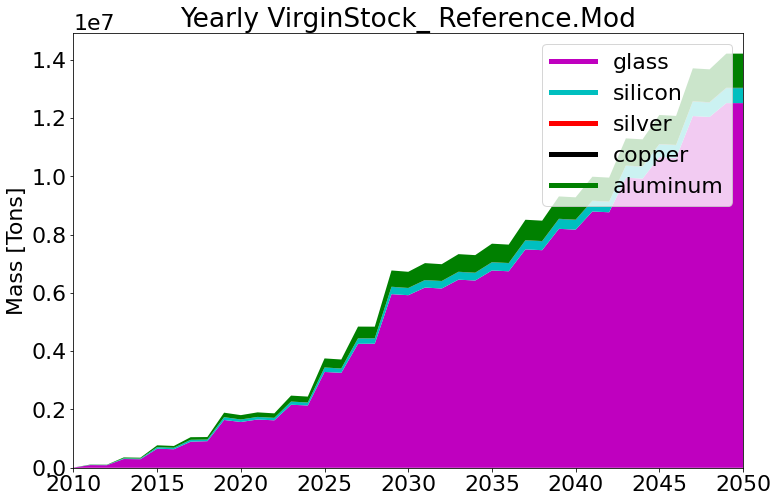

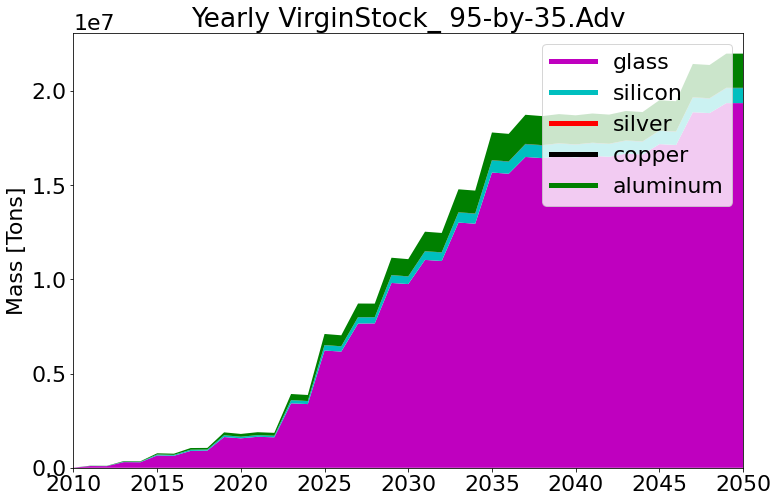

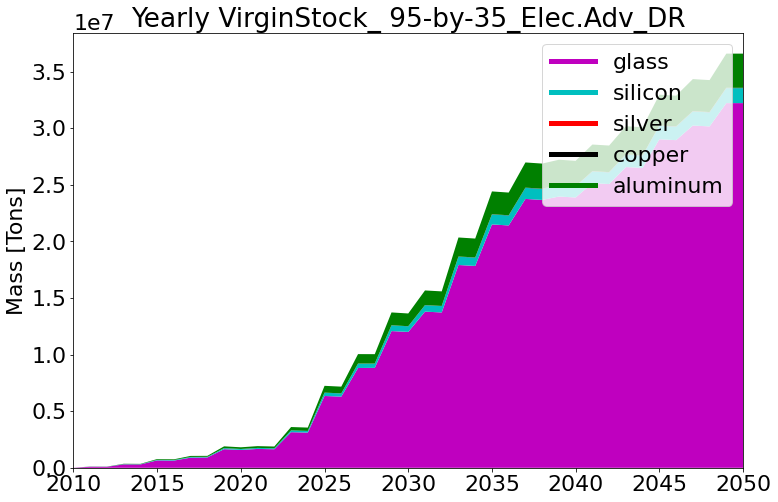

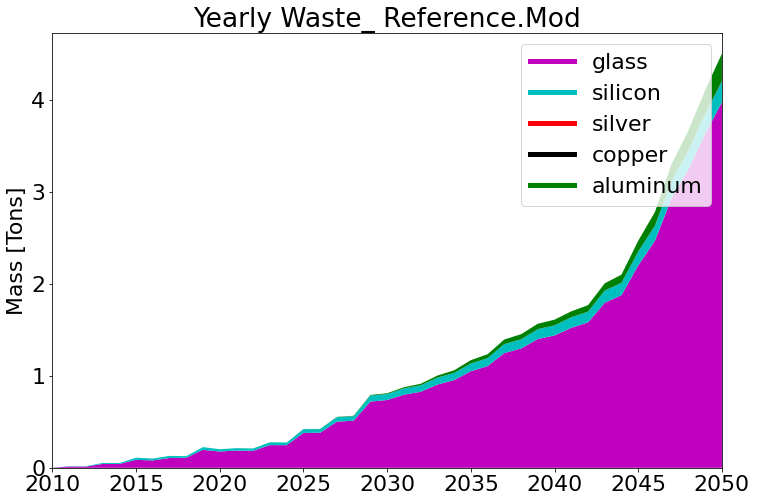

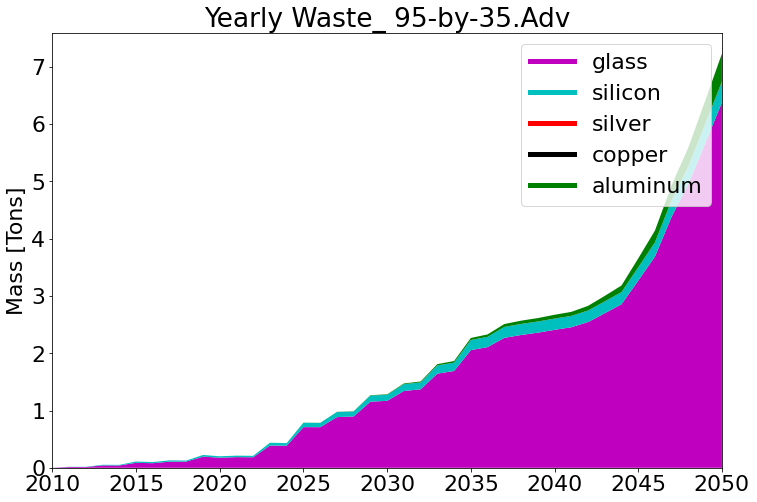

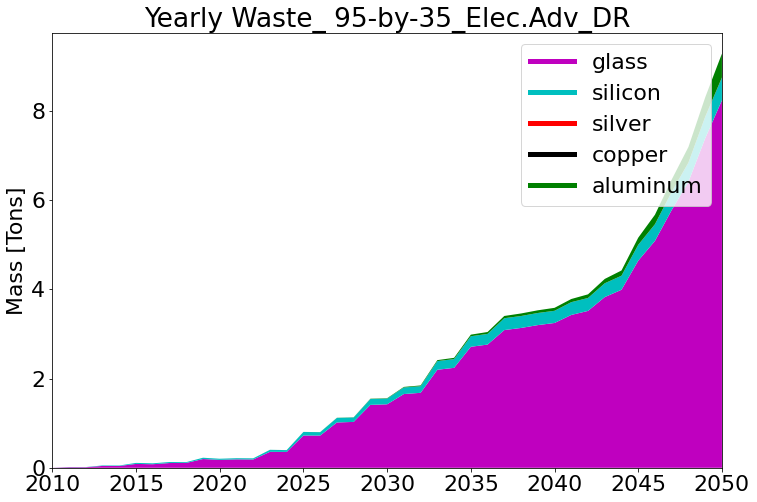

In [70]:
keywords=['VirginStock_', 'Waste_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        obj = SFScenarios[kk]
        plt.figure()
        plt.plot([],[],color='m', label='glass', linewidth=5)
        plt.plot([],[],color='c', label='silicon', linewidth=5)
        plt.plot([],[],color='r', label='silver', linewidth=5)
        plt.plot([],[],color='k', label='copper', linewidth=5)
        plt.plot([],[],color='g', label='aluminum', linewidth=5)

        plt.stackplot(obj.scenario[PCAs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['m','c','r','k', 'g'])
        plt.ylabel('Mass [Tons]')
        plt.xlim([2010, 2050])
        plt.title('Yearly '+keyw+ ' ' + obj.name)
        plt.legend(materials)


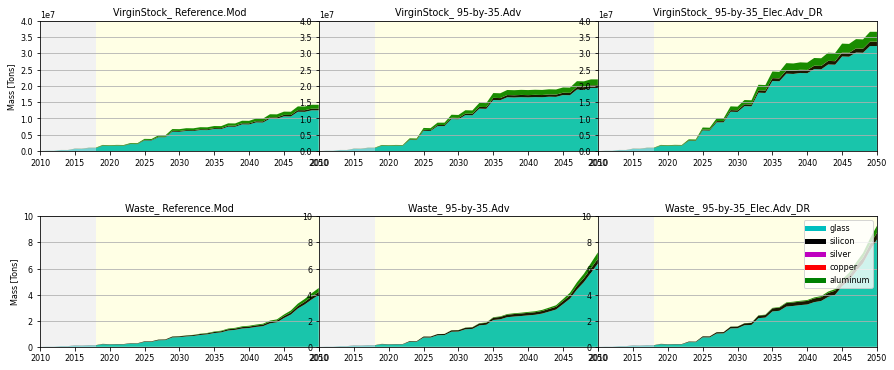

In [88]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

    
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[PCAs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

        
for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 10])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [63]:
r1.name

'Reference.Mod'

In [ ]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearly=pd.DataFrame()


for ii in range (0, len(materials)):    
    material = materials[ii]
    foo = r1.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo = r1.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo = foo.to_frame(name=material)
    USyearly[material] = foo[material]

    for jj in range (1, len(PCAs)): 
        USyearly[material] += r1.scenario[PCAs[jj]].material[material].materialdata[keyword]

USyearly = USyearly/907185
USyearly.head()


plt.plot([],[],color='m', label='glass', linewidth=5)
plt.plot([],[],color='c', label='silicon', linewidth=5)
plt.plot([],[],color='r', label='silver', linewidth=5)
plt.plot([],[],color='k', label='copper', linewidth=5)
plt.plot([],[],color='g', label='aluminum', linewidth=5)

plt.stackplot(r1.scenario[PCAs[0]].data['year'], USyearly['glass'], USyearly['silicon'], USyearly['silver'], USyearly['copper'], USyearly['aluminum'], colors=['m','c','r','k', 'g'])
plt.ylabel('Mass [Tons]')
plt.xlim([2010, 2050])
plt.title(keyword)
plt.legend(materials)



## Calculating Cumulative Yearly Waste for US

In [ ]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

    
plt.plot([],[],color='m', label='glass', linewidth=5)
plt.plot([],[],color='c', label='silicon', linewidth=5)
plt.plot([],[],color='r', label='silver', linewidth=5)
plt.plot([],[],color='k', label='copper', linewidth=5)
plt.plot([],[],color='g', label='aluminum', linewidth=5)

plt.stackplot(r1.scenario[PCAs[0]].data['year'], UScum['glass'], UScum['silicon'], UScum['silver'], UScum['copper'], UScum['aluminum'], colors=['m','c','r','k', 'g'])
plt.ylabel('Mass [Tons]')
plt.xlim([2010, 2050])
plt.title('Cumulative')
plt.legend(materials)

plt.figure()
plt.stackplot(r1.scenario[PCAs[0]].data['year'], UScum['glass'], UScum['silicon'], UScum['silver'], UScum['copper'], UScum['aluminum'], colors=['m','c','r','k', 'g'])
plt.ylabel('Mass [Tons]')
plt.title('Cumulative')
plt.xlim([2010, 2050])
plt.yscale('log')
plt.legend(materials)

## Non stacked plot, previuos method

In [ ]:
''' 
material1='glass'
material2='silicon'
material3='silver'
keyword='mat_Total_Landfilled'

USlandfill_glass = r1.scenario[PCAs[0]].material[material1].materialdata[keyword]
USlandfill_silicon = r1.scenario[PCAs[0]].material[material2].materialdata[keyword]
USlandfill_silver = r1.scenario[PCAs[0]].material[material3].materialdata[keyword]

for jj in range (1, len(PCAs)): 
    USlandfill_glass += r1.scenario[PCAs[jj]].material[material1].materialdata[keyword] 
    USlandfill_silicon += r1.scenario[PCAs[jj]].material[material2].materialdata[keyword] 
    USlandfill_silver += r1.scenario[PCAs[jj]].material[material3].materialdata[keyword]
    
UScumsumlandfill_glass = np.cumsum(USlandfill_glass)
UScumsumlandfill_silicon = np.cumsum(USlandfill_silicon)
UScumsumlandfill_silver = np.cumsum(USlandfill_silver)


plt.plot(r1.scenario[PCAs[0]].data['year'], UScumsumlandfill_glass, label='Glass')
plt.plot(r1.scenario[PCAs[0]].data['year'], UScumsumlandfill_silicon, label='Silicon')
plt.plot(r1.scenario[PCAs[0]].data['year'], UScumsumlandfill_silver, label='Silver')
'''

# GEOPANDAS

In [ ]:
latitude_all =[]
longitude_all = []
cumulativewaste2050 = []
for scen in r1.scenario.keys():
    latitude_all.append(r1.scenario[scen].latitude)
    longitude_all.append(r1.scenario[scen].longitude)
    cumulativewaste2050.append(r1.scenario[scen].material['glass'].materialdata['mat_Total_Landfilled'].sum())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

street_map = gpd.read_file(r'C:\Users\sayala\Desktop\geopandas\cb_2018_us_nation_20m\cb_2018_us_nation_20m.shp')

# Show the map only
#fig, ax = plt.subplots(figsize=(10,15))
#street_map.plot(ax=ax)

In [ ]:
frame = { 'Latitude': latitude_all, 'Longitude': longitude_all, 'CumulativeWaste2050': cumulativewaste2050}   
df = pd.DataFrame(frame) 

In [ ]:
df.head()

In [ ]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geometry[:3]

In [ ]:
crs = {'init':'epsg:4326'}

In [ ]:
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created
geo_df.head()

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['CumulativeWaste2050'] >= 1.918125e+09].plot(ax=ax, markersize = 20, color= "blue", marker = "o", label = "Bigger Than")
geo_df[geo_df['CumulativeWaste2050'] < 1.918125e+09].plot(ax=ax, markersize = 20, color= "red", marker = "o", label = "Less Than")
plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.legend(prop={'size':15})

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

latitude = random.sample(range(25, 45), 10) 
longitude = random.sample(range(-125, -65), 10) 
weight = random.sample(range(0, 500), 10) 

frame = { 'Latitude': latitude, 'Longitude': longitude, 'Weight': weight}   
df = pd.DataFrame(frame) 

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created

fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['Weight'] >=250].plot(ax=ax, markersize = 20, color= "blue", marker = "o", label = "Bigger Than")
geo_df[geo_df['Weight'] < 250].plot(ax=ax, markersize = 20, color= "red", marker = "o", label = "Less Than")
plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.legend(prop={'size':15})

In [ ]:
import geoplot


In [ ]:
ax = street_map.kdeplot(
    geo_df, #clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

In [ ]:
import scipy.stats
import seaborn.palettes
import seaborn.utils


In [ ]:
axis = [-130, 48.1667, -70, 100.1667]

In [ ]:
latlng_bounds = area.total_bounds
area = area.to_crs(epsg=3857)
axis = area.total_bounds

# Create the map stretching over the requested area
ax = area.plot(alpha=0)

In [ ]:
# Calculate the KDE
data = np.c_[df.Longitude, df.Latitude]
kde = scipy.stats.gaussian_kde(data.T, bw_method="scott", weights=df.CumulativeWaste2050)
data_std = data.std(axis=0, ddof=1)
bw_x = getattr(kde, "scotts_factor")() * data_std[0]
bw_y = getattr(kde, "scotts_factor")() * data_std[1]
grid_x = grid_y = 100
x_support = seaborn.utils._kde_support(data[:, 0], bw_x, grid_x, 3, (axis[0], axis[2]))
y_support = seaborn.utils._kde_support(data[:, 1], bw_y, grid_y, 3, (axis[1], axis[3]))
xx, yy = np.meshgrid(x_support, y_support)
levels = kde([xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [ ]:
cset = ax.contourf(xx, yy, levels,
    20, # n_levels

    cmap=seaborn.palettes.blend_palette(('#ffffff10', '#ff0000af'), 6, as_cmap=True),
    antialiased=True,       # avoids lines on the contours to some extent
)

In [ ]:
def add_basemap(ax, latlng_bounds, axis, url='https://a.basemaps.cartocdn.com/light_all/tileZ/tileX/tileY@2x.png'):
    prev_ax = ax.axis()
    # TODO: Zoom should surely take output pixel request size into account...
    zoom = ctx.tile._calculate_zoom(*latlng_bounds)
    while ctx.tile.howmany(*latlng_bounds, zoom, ll=True) > max_tiles:      # dont ever try to download loads of tiles
        zoom = zoom - 1
    print("downloading %d tiles with zoom level %d" % (ctx.tile.howmany(*latlng_bounds, zoom, ll=True), zoom))
    basemap, extent = ctx.bounds2img(*axis, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    ax.axis(prev_ax)        # restore axis after changing the background
 
add_basemap(ax, latlng_bounds, axis)

In [ ]:
import geopandas as gpd


import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

def make_plot(projection_name, projection_crs, extent, heat_data):
    """
    ?
    """
    fig = plt.figure()
    rect = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes(rect, projection=projection_crs)

    # Set display limits to include a set region of latitude * longitude.
    # (Note: Cartopy-specific).
    ax.set_extent(extent, crs=projection_crs)

    # Add coastlines and meridians/parallels (Cartopy-specific).
    ax.coastlines(linewidth=0.2, color='black')
    ax.gridlines(crs=projection_crs, linestyle='-')

    lat = np.linspace(extent[0],extent[1],heat_data.shape[0])
    lon = np.linspace(extent[2],extent[3],heat_data.shape[1])
    Lat,Lon = np.meshgrid(lat,lon)
    ax.pcolormesh(Lat,Lon,np.transpose(heat_data))
    plt.savefig("Test_fig.pdf", bbox_inches='tight')


def main():
    #extent = (-65.0, -62, 44, 45.5)
    extent = (-90, -40, 30, 60)
    # Define some test points with latitude and longitude coordinates.
    #city_data = [('Halifax, NS', 44.67, -63.61, 'black'),
    #             ('Neighbour', 45, -63, 'blue'),
    #             ('Other_Place', 44.1, -64, 'red')]
    heat_data = np.random.normal(0.0,0.2,size=(100,150))

    # Demonstrate with two different display projections.
    # Define a Cartopy 'ordinary' lat-lon coordinate reference system.
    crs_latlon = ccrs.PlateCarree()
    make_plot('Equidistant Cylindrical', crs_latlon, extent, heat_data)
    #crs_ae = ccrs.LambertCylindrical()
    #make_plot('Lambert Cylindrical', crs_ae, extent, heat_data)

if __name__ == '__main__':
    main()

In [ ]:
df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')